In [105]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


In [106]:
file_path = "Student_performance_10k.csv"

In [107]:
df = pd.read_csv(file_path)

In [108]:
df

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,some college,1.0,0.0,78.0,60.0,46.0,58.0,242.0,C
9996,std-9997,female,group C,bachelor's degree,1.0,0.0,37.0,92.0,99.0,73.0,301.0,B
9997,std-9998,female,group B,associate's degree,1.0,1.0,70.0,71.0,100.0,90.0,331.0,A
9998,std-9999,female,group B,some high school,1.0,0.0,87.0,60.0,100.0,89.0,336.0,A


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      10000 non-null  object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9975 non-null   float64
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(7), object(5)
memory usage: 937.6+ KB


In [110]:
missing_values = df.isnull().sum()
print(missing_values)

roll_no                         0
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     25
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


In [111]:
duplicate_rows = df.duplicated().sum()
print(f'No. of Duplicate rows: {duplicate_rows}')

No. of Duplicate rows: 0


In [112]:
unique_values = df.nunique()
print(unique_values)

roll_no                        10000
gender                             4
race_ethnicity                    11
parental_level_of_education        6
lunch                              2
test_preparation_course            2
math_score                        98
reading_score                     84
writing_score                     91
science_score                     92
total_score                      257
grade                              5
dtype: int64


In [113]:
df.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [114]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Show unique values for each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique categories in '{col}': {unique_values}")

Unique categories in 'roll_no': ['std-01' 'std-02' 'std-03' ... 'std-9998' 'std-9999' 'std-10000']
Unique categories in 'gender': ['male' nan 'Boy' 'female' 'Girl']
Unique categories in 'race_ethnicity': ['group D' 'group B' 'group C' 'group E' 'group A' 'A' nan 'C' 'D'
 'group C\\n' 'B' 'E']
Unique categories in 'parental_level_of_education': ['some college' 'high school' "master's degree" "associate's degree" nan
 'some high school' "bachelor's degree"]
Unique categories in 'grade': ['C' 'A' 'B' 'D' nan 'Fail']


In [115]:
df['race_ethnicity'] = df['race_ethnicity'].replace({
    'E': 'group E',
    'A': 'group A',
    'B': 'group B',
    'D': 'group D',
    'C': 'group C',
    'group C\\n': 'group C'
})

In [116]:
df['gender'] = df['gender'].replace({
    'boy': 'male',
    'Girl': 'female',
    'Boy': 'male',


})

In [117]:
df['grade'] = df['grade'].replace({
    'Fail': 'F',
})

In [118]:
df.drop('lunch', axis=1, inplace=True)

In [119]:
df['test_preparation_course'] = df['test_preparation_course'].apply(lambda x: True if x == 1 else False)


In [120]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [121]:
df.head(17)

,roll_no,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,True,89.0,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,False,65.0,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,False,10.0,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,True,22.0,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,True,26.0,58.0,64.0,65.0,213.0,C
5,std-06,male,group B,high school,False,40.0,49.0,69.0,48.0,206.0,C
6,std-07,NaN,group C,some college,False,34.0,48.0,84.0,73.0,239.0,C
7,std-08,male,group B,associate's degree,True,25.0,80.0,34.0,17.0,156.0,D
8,std-09,male,group C,NaN,True,28.0,79.0,100.0,76.0,283.0,B
9,std-10,male,group C,some high school,False,71.0,22.0,85.0,39.0,217.0,C


In [122]:

# Copy the dataset to avoid modifying the original

# List of categorical columns to predict
target_columns = ['gender', 'parental_level_of_education', 'test_preparation_course','grade','race_ethnicity']

# Features to use for prediction
features = ['math_score', 'reading_score', 'writing_score', 'total_score']

# Iterate through each target column to predict missing values
for target_col in target_columns:
    # Split rows with and without missing target values
    df_with_target = df[df[target_col].notnull()]
    df_without_target = df[df[target_col].isnull()]

    if df_without_target.empty:
        continue  # Skip if no missing values

    # Define features (X) and target (y) for training
    X = df_with_target[features]
    y = df_with_target[target_col]

    # Train a Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)

    # Prepare features for rows with missing target values
    X_missing = df_without_target[features]

    # Predict the missing target values
    predicted_values = rf.predict(X_missing)

    # Update the original DataFrame with the predicted values
    df.loc[df[target_col].isnull(), target_col] = predicted_values

# Print the updated DataFrame
print(df)


        roll_no  gender race_ethnicity parental_level_of_education  \
0        std-01    male        group D                some college   
1        std-02    male        group B                 high school   
2        std-03    male        group C             master's degree   
3        std-04    male        group D                some college   
4        std-05    male        group C                some college   
...         ...     ...            ...                         ...   
9995   std-9996  female        group C                some college   
9996   std-9997  female        group C           bachelor's degree   
9997   std-9998  female        group B          associate's degree   
9998   std-9999  female        group B            some high school   
9999  std-10000  female        group B                 high school   

      test_preparation_course  math_score  reading_score  writing_score  \
0                        True        89.0           38.0           85.0   
1        

In [123]:
missing_values = df.isnull().sum()
print(missing_values)

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


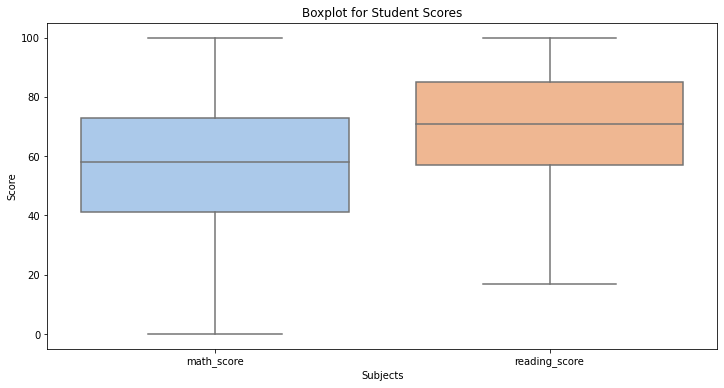

In [124]:
score_columns = ['math_score', 'reading_score']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[score_columns], palette='pastel')
plt.title('Boxplot for Student Scores')
plt.xlabel('Subjects')
plt.ylabel('Score')
plt.show()


In [125]:
def check_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = len(outlier_rows)
        print(f"{col}: {len(outlier_rows)} outliers found")

    return outliers

numeric_columns = ['math_score', 'reading_score']
outliers_iqr = check_outliers_iqr(df, numeric_columns)

math_score: 0 outliers found
reading_score: 0 outliers found


In [126]:
# Define custom bin edges
bins = [-1,60,70,80,90,100]

# Apply custom binning
df['math_grade'] = pd.cut(df['math_score'], bins=bins, labels=['F','D','C','B','A'])
df['reading_grade'] = pd.cut(df['reading_score'], bins=bins, labels=['F','D','C','B','A'])
df['writing_grade'] = pd.cut(df['writing_score'], bins=bins, labels=['F','D','C','B','A'])
df['science_grade'] = pd.cut(df['science_score'], bins=bins, labels=['F','D','C','B','A'])



print(df)

        roll_no  gender race_ethnicity parental_level_of_education  \
0        std-01    male        group D                some college   
1        std-02    male        group B                 high school   
2        std-03    male        group C             master's degree   
3        std-04    male        group D                some college   
4        std-05    male        group C                some college   
...         ...     ...            ...                         ...   
9995   std-9996  female        group C                some college   
9996   std-9997  female        group C           bachelor's degree   
9997   std-9998  female        group B          associate's degree   
9998   std-9999  female        group B            some high school   
9999  std-10000  female        group B                 high school   

      test_preparation_course  math_score  reading_score  writing_score  \
0                        True        89.0           38.0           85.0   
1        

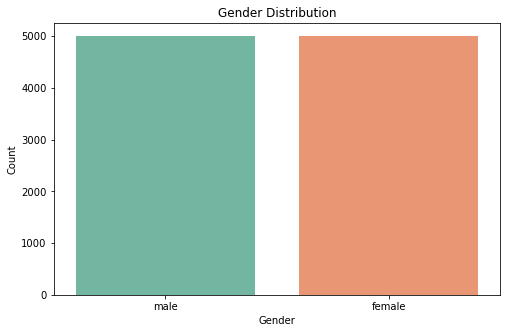

In [127]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


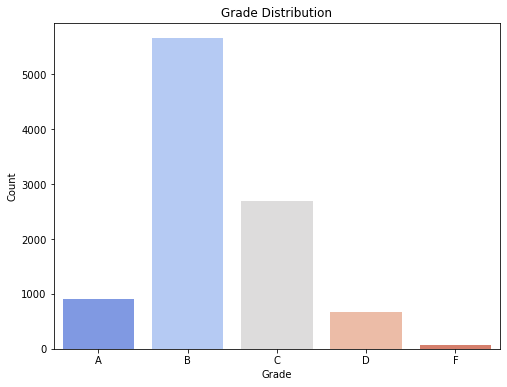

In [128]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade', palette='coolwarm', order=['A', 'B', 'C', 'D', 'F'])
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


In [129]:
df.head(17)

,roll_no,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,math_grade,reading_grade,writing_grade,science_grade
0,std-01,male,group D,some college,True,89.0,38.0,85.0,26.0,238.0,C,B,F,B,F
1,std-02,male,group B,high school,False,65.0,100.0,67.0,96.0,328.0,A,D,A,D,A
2,std-03,male,group C,master's degree,False,10.0,99.0,97.0,58.0,264.0,B,F,A,A,F
3,std-04,male,group D,some college,True,22.0,51.0,41.0,84.0,198.0,D,F,F,F,B
4,std-05,male,group C,some college,True,26.0,58.0,64.0,65.0,213.0,C,F,F,D,D
5,std-06,male,group B,high school,False,40.0,49.0,69.0,48.0,206.0,C,F,F,D,F
6,std-07,female,group C,some college,False,34.0,48.0,84.0,73.0,239.0,C,F,F,B,C
7,std-08,male,group B,associate's degree,True,25.0,80.0,34.0,17.0,156.0,D,F,C,F,F
8,std-09,male,group C,high school,True,28.0,79.0,100.0,76.0,283.0,B,F,C,A,C
9,std-10,male,group C,some high school,False,71.0,22.0,85.0,39.0,217.0,C,C,F,B,F


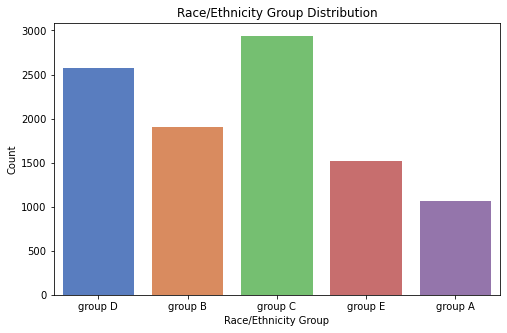

In [130]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='race_ethnicity', palette='muted')
plt.title('Race/Ethnicity Group Distribution')
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Count')
plt.show()


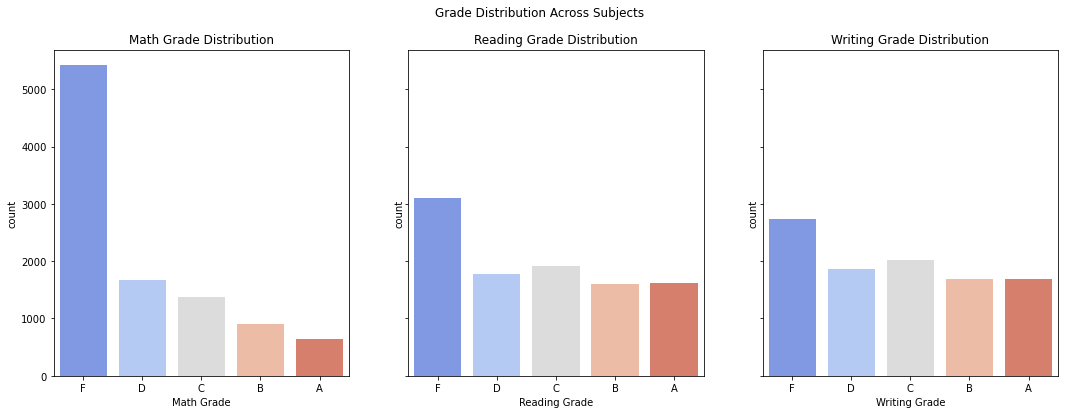

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.countplot(data=df, x='math_grade', ax=axes[0], palette='coolwarm')
axes[0].set_title('Math Grade Distribution')
axes[0].set_xlabel('Math Grade')

sns.countplot(data=df, x='reading_grade', ax=axes[1], palette='coolwarm')
axes[1].set_title('Reading Grade Distribution')
axes[1].set_xlabel('Reading Grade')

sns.countplot(data=df, x='writing_grade', ax=axes[2], palette='coolwarm')
axes[2].set_title('Writing Grade Distribution')
axes[2].set_xlabel('Writing Grade')

plt.suptitle('Grade Distribution Across Subjects')
plt.show()


In [132]:
# # Create the interaction term
# df['TestPreparation_total'] = df['test_preparation_course'] * df['total_score']

# # Display the relevant columns to verify
# print(df[['test_preparation_course', 'total_score', 'TestPreparation_total']].head())


In [133]:
df.to_csv('cleaned_student_performance.csv')
